## Inicjalizacja danych
### Import potrzebnych bibliotek oraz ładowanie pliku z modelami do zmiennej typu tuple 
***
#### Wymagane biblioteki:
* matplotlib
* numpy
* pandas
* sklearn (importowana później)
* seabor  (importowana później)


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


t = np.load("configurations3_linear.npy", allow_pickle = True)  #ładowanie danych z pliku
print(type(t))
print("dtype:", t.dtype)
print("ndim: ", t.ndim)
print("shape:", t.shape)
print("size: ", t.size)
#print(t)


configurations = np.load("configurations3_linear.npy", allow_pickle = True)

print("#  | loss           | norm  | out_ac       | epochs | hidden layers ")
print("----------------------------------------------------------------------------------------")
for i, result in enumerate(configurations):
    print("{0:2d} | {1:6.10f} | {2:5} | {3:12s} | {4:6d} | {5}".format(i, result[4], result[0], result[2], result[3], result[1]))
    if i == 10:
        break



<class 'numpy.ndarray'>
dtype: object
ndim:  2
shape: (720, 5)
size:  3600
#  | loss           | norm  | out_ac       | epochs | hidden layers 
----------------------------------------------------------------------------------------
 0 | 85422306.0413793176 |     1 | linear       |     10 | [(16, 'linear')]
 1 | 129261217.7103448212 |     1 | linear       |     20 | [(16, 'linear')]
 2 | 132886589.6827586144 |     1 | linear       |     30 | [(16, 'linear')]
 3 | 0.3254800678 |     1 | sigmoid      |     10 | [(16, 'linear')]
 4 | 0.3530835134 |     1 | sigmoid      |     20 | [(16, 'linear')]
 5 | 0.3530835134 |     1 | sigmoid      |     30 | [(16, 'linear')]
 6 | 157537131.5862068832 |     1 | linear       |     10 | [(32, 'linear')]
 7 | 162773042.7586206794 |     1 | linear       |     20 | [(32, 'linear')]
 8 | 160062372.2482758760 |     1 | linear       |     30 | [(32, 'linear')]
 9 | 0.3254800678 |     1 | sigmoid      |     10 | [(32, 'linear')]
10 | 0.3530835134 |     1 | si

## Modelowanie danych
***
#### Wykonujemy cztery modelowania:
1. Usuwamy wszystkie wiersze w których wartość straty jest większa od 1 (odchylenia nie powinny przekraczać 1)
2. Zliczanie ilości warstw i zastępowanie listy zliczoną wartością
3. Zamiana nazw funkcji aktywacji na wartości liczbowe, prostsze do obliczeń
4. Zamiana na % oraz skrócenie rozwinięcia dziesiętnego wartości strat

In [32]:
#1 Usuwanie loss>1
mask = np.ones(len(t), dtype=bool)
i=0
while i < len(t): 
    if(t[i,4] >1):
        mask[[i]] = False
    i+=1 
result = t[mask, ...]
print('Tablica danych po usunięciu wyników nieprawidłowych: \n',result)
##########################################################################################
#2 Zastępowanie listy ilością warstw
hidden = []
i=0
while i < len(result): 
    if(len(result[i,1]) ==1):
        hidden.append(1)
    elif(len(result[i,1]) ==2):
        hidden.append(2)
    elif(len(result[i,1]) ==3):
        hidden.append(3)
    elif(len(result[i,1]) ==4):
        hidden.append(4)
    i+=1
print('Długość tablicy z ukrytymi warstwami: ', len(hidden))
##########################################################################################
#3 Zamiana f aktywacji na wartości 0,1
#LINEAR = 0
#SIGMOID = 1
activ = []

i=0
while i < len(result): 
    if(result[i,2] == "linear"):
        activ.append(0)
    elif(result[i,2] == "sigmoid"):
        activ.append(1)
   
    i+=1
    

print('Typ activ: ', type(activ))
##########################################################################################
#4 Uproszczenie wartości strat
loss = []
i=0
while i<len(result):
    if(result[i,4] <= 1): loss.append(float(int(result[i,4]*100)))
    i+=1


#Utworzenie zmiennych odpowiadających swoim kolumnom
norm = result[:,0]
epochs = result[:,3]


Tablica danych po usunięciu wyników nieprawidłowych: 
 [[True list([(16, 'linear')]) 'sigmoid' 10 0.32548006778133326]
 [True list([(16, 'linear')]) 'sigmoid' 20 0.3530835133688203]
 [True list([(16, 'linear')]) 'sigmoid' 30 0.3530835133688203]
 ...
 [True
  list([(64, 'linear'), (64, 'linear'), (64, 'linear'), (64, 'linear')])
  'sigmoid' 10 0.32548006778133326]
 [True
  list([(64, 'linear'), (64, 'linear'), (64, 'linear'), (64, 'linear')])
  'sigmoid' 20 0.3530835133688203]
 [True
  list([(64, 'linear'), (64, 'linear'), (64, 'linear'), (64, 'linear')])
  'sigmoid' 30 0.3530835133688203]]
Długość tablicy z ukrytymi warstwami:  360
Typ activ:  <class 'list'>


## Wykresy zależności parametru loss (straty)
***
#### Scatter plot z wartości normalizacji oraz strat

Text(0.5, 0, 'Loss')

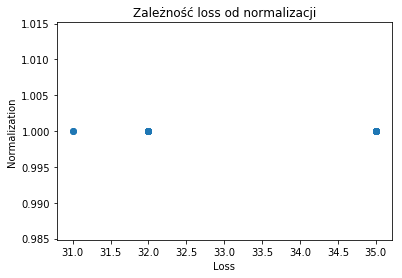

In [15]:
plt.figure()
plt.scatter(loss, result[:,0])
plt.title('Zależność loss od normalizacji')
plt.ylabel('Normalization')
plt.xlabel("Loss")



<class 'int'> 360


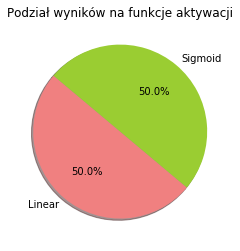

In [16]:
f =0
t =0
for i in configurations[:,4]:
    if i > 1:
        f+=1
    else:
        t+=1
print('Typ i długość t,f: ', type(t),f)
labels = 'Linear', 'Sigmoid'
sizes = [t, f]
colors = ['lightcoral', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Podział wyników na funkcje aktywacji')
plt.show()

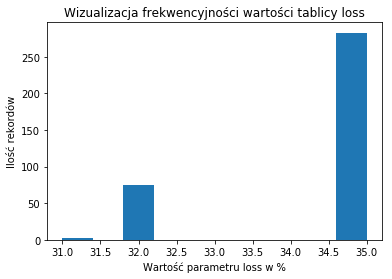

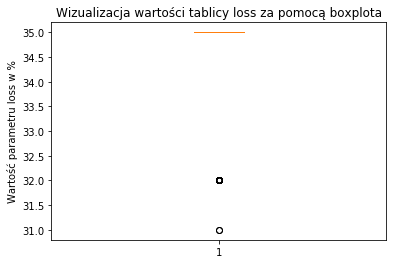

In [33]:
plt.figure()
plt.hist(loss, bins = 10)
plt.title('Wizualizacja frekwencyjności wartości tablicy loss')
plt.xlabel('Wartość parametru loss w %')
plt.ylabel('Ilość rekordów')
plt.show()
plt.figure()
plt.boxplot(loss)
plt.title('Wizualizacja wartości tablicy loss za pomocą boxplota')
plt.ylabel('Wartość parametru loss w %')
plt.show()

# Przygotowanie danych treningowych

In [18]:
from sklearn.model_selection import train_test_split

dn = pd.DataFrame(norm)
de = pd.DataFrame(epochs)
da = pd.DataFrame(activ)
dl = pd.DataFrame(loss)
dh = pd.DataFrame(hidden)
#print (t[:,4].value_counts())

df = pd.DataFrame({ 
    'Norm': norm,
    'Epochs': epochs,
    'Activ': activ,
    'Hidden': hidden,
    'Loss': loss})
print(df.head(4))

x_values =df[['Norm', 'Epochs', 'Activ', 'Hidden']]
y_values = df['Loss']
print('Wielkość tabeli y_values: ' ,len(y_values))
print('Wielkość tabeli x_values: ' , len(x_values))







   Norm Epochs  Activ  Hidden  Loss
0  True     10      1       1  32.0
1  True     20      1       1  35.0
2  True     30      1       1  35.0
3  True     10      1       1  32.0
360
360


# Najlepsze modele posortowane po największej dokładności

In [34]:
r = pd.DataFrame({ 
    'Norm': norm,
    'Epochs': epochs,
    'Activ': activ,
    'Hidden': hidden,
    'Loss': loss})

vis = r.sort_values(by = ['Loss'], ascending = True)
print(vis.head(10))


     Norm Epochs  Activ  Hidden  Loss
249  True     10      1       4  31.0
99   True     10      1       3  31.0
0    True     10      1       1  32.0
151  True     20      1       4  32.0
152  True     30      1       4  32.0
79   True     20      1       3  32.0
78   True     10      1       3  32.0
153  True     10      1       4  32.0
154  True     20      1       4  32.0
298  True     20      1       4  32.0


### Średnie wartości loss w zależności od liczby epoków

Średni loss gdy epochs = 10:  34.5 %
Średni loss gdy epochs = 20:  34.75 %
Średni loss gdy epochs = 30:  34.87 %


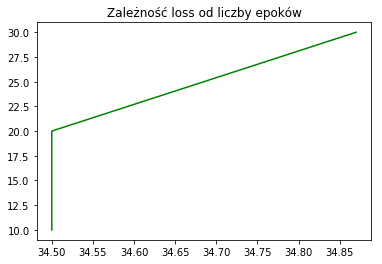

In [35]:
th = 0.0
te = 0.0
tw = 0.0
hi = 0
ei = 0
wi = 0
i=0
while i < len(epochs):
    if result[i,3] == 10:
        te+= result[i,4]
        ei+=1
    elif result[i,3] == 20:
        tw+= result[i,4]
        wi+=1
    else: 
        th+= result[i,4]
        hi+=1
    i+=1

sre =  float(int(te/ei*10000)/100)
srw = float(int(tw/wi*10000)/100)
srh = float(int(th/hi*10000)/100)
print('Średni loss gdy epochs = 10: ', sre, '%')
print('Średni loss gdy epochs = 20: ', srw, '%')
print('Średni loss gdy epochs = 30: ', srh, '%')

plt.figure()
plt.plot([sre,sre,srh], [10,20,30], c = 'g')
plt.title('Zależność loss od liczby epoków')
plt.show()

### Średnie wartości loss w zależności od ilości warstw

Średni loss gdy jest 1 ukryta warstwa  34.5 %
Średni loss gdy są 2 ukryte warstwy  34.75 %
Średni loss gdy są 3 ukryte warstwy  34.87 %
Średni loss gdy są 4 ukryte warstwy  34.87 %


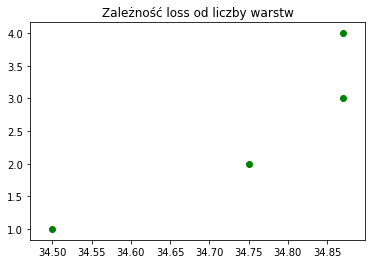

In [36]:
one = 0.0
two = 0.0
three = 0.0
four = 0.0
ione = 0
itwo = 0
ithree = 0
ifour =0

i=0
while i < len(hidden):
    if result[i,1] == 1:
        one+= result[i,4]
        ione+=1
    elif result[i,1] == 2:
        two+= result[i,4]
        itwo+=1
    elif result[i,1] == 3:
        three+= result[i,4]
        ithree+=1
    else: 
        four+= result[i,4]
        ifour+=1
    i+=1

srone =  float(int(te/ei*10000)/100)
srtwo = float(int(tw/wi*10000)/100)
srthree = float(int(th/hi*10000)/100)
srfour = float(int(th/hi*10000)/100)
print('Średni loss gdy jest 1 ukryta warstwa ', srone, '%')
print('Średni loss gdy są 2 ukryte warstwy ', srtwo, '%')
print('Średni loss gdy są 3 ukryte warstwy ', srthree, '%')
print('Średni loss gdy są 4 ukryte warstwy ', srfour, '%')


plt.figure()
plt.scatter([srone,srtwo,srthree, srfour], [1,2,3,4], c = 'g')
plt.title('Zależność loss od liczby warstw')
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.25,random_state=10)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)
print(x_train_scale)



[[ 0.         -0.00907256  0.         -2.10213779]
 [ 0.         -1.23386783  0.         -0.75397341]
 [ 0.         -0.00907256  0.          0.59419097]
 ...
 [ 0.         -1.23386783  0.         -2.10213779]
 [ 0.          1.21572272  0.          0.59419097]
 [ 0.         -0.00907256  0.          0.59419097]]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  import sys


# Trening na podstawie KNN

In [24]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy = []
num_neigh = []

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier. 
for ii in range(1,60):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy)

[0.7777777777777778, 0.7555555555555555, 0.7888888888888889, 0.7888888888888889, 0.8111111111111111, 0.8111111111111111, 0.8, 0.6666666666666666, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


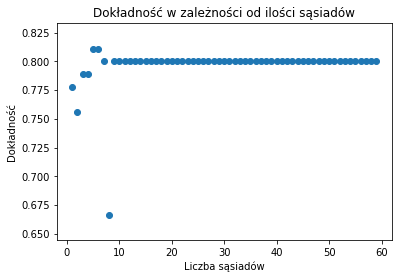

In [37]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Dokładność')
plt.title('Dokładność w zależności od ilości sąsiadów')
plt.show();

In [39]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN = KNN.fit(x_train_scale,y_train)

In [40]:
y_predict = KNN.predict(x_test_scale)
print(y_predict)
print(y_predict.dtype)

[35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.]
float64


In [41]:
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_predict))  

[[ 0 18]
 [ 0 72]]


# Wizualizacja dokładności za pomocą heatmapy

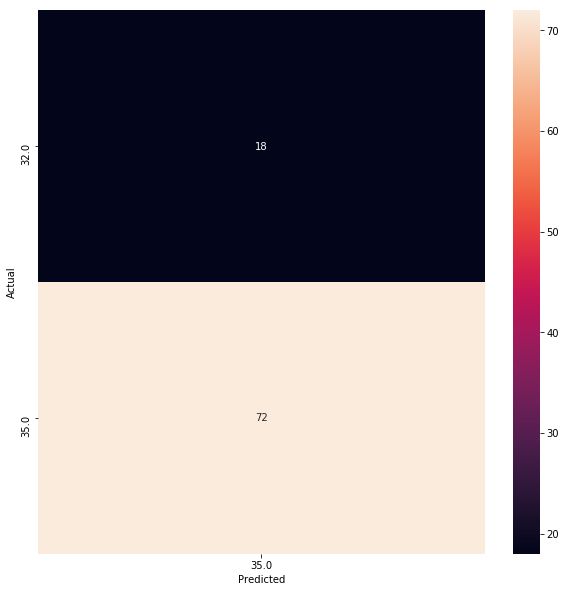

In [43]:
import seaborn as sns

# Tworzenie nowego dataframe
df = pd.DataFrame()

# Tworzenie nowych kolumn z dataframe
df['Actual'] = y_test
df['Predicted'] = y_predict

freq, ax = plt.subplots(figsize=(10,10)) 
freq = pd.crosstab(df.Actual,df.Predicted)
sns.heatmap(freq,annot=True,fmt="d", ax = ax)

# Input testowy dla użytkownika przewidujący wartość parametru loss

In [ ]:
test = pd.DataFrame()
KNN2 = KNeighborsClassifier(n_neighbors=30)
KNN2 = KNN.fit(x_train_scale,y_train)

test['Norm']= [input('Normalizacja (1 or 0): ')]
test['Epochs']= [input('Liczba epoków (10,20,30): ')]
test['Activ']=[input('Funkcja akrywacji (linear = 0, sigmoid = 1): ')]
test['Hidden']= [input('Liczba ukrytych warstw (1, 2,3,4): ' )]

predict_test2= KNN2.predict(test)
print('Predicted loss: ',predict_test2, '%')
